<a href="https://colab.research.google.com/github/r-prateek/Indian-Currency-Notes-Classifier/blob/main/Indian_Currency_Vanilla_CNN-15-epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Dataset from Kaggle**

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020
! unzip indian-currency-note-images-dataset-2020.zip -d dataset

#**Using Image Generator for Data Augmentation and initializing paths for the datasets.**

Libraries used are:
```
tensorflow
matplotlib
```

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
train_path = "/content/dataset/Indian currency dataset v1/training"
test_path = "/content/dataset/Indian currency dataset v1/validation"

##Data Augmentation

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range= 5
)

In [ ]:
train_data = datagen.flow_from_directory(
    train_path,
    target_size = (190, 190),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865,
)

In [ ]:
test_data = datagen.flow_from_directory(
    test_path,
    target_size = (190, 190),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

#**Creating the Model**

##Convolutional Neural Network

The convolutional neural network plays an important role in feature extraction from the input image, sufficiently changing the weights (filter).

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (190, 190, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'))
# model.add(tf.keras.layers.MaxPooling2D((2,2)))


##Artificial Deep Neural Network

The Artificial Deep Neural Network flattens the input fed by the Convolutional network, and classifies images into respective classes.


In [11]:
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation= 'relu'))
model.add(tf.keras.layers.Dense(64, activation= 'relu'))
model.add(tf.keras.layers.Dense(8, activation= 'softmax'))

##Compiling and Summarising the model

*  Optimizer used is **Adam**
*  Loss function used is **Categorical CrossEntropy**


In [12]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 188, 188, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 44, 44, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123904)            0

#**Training the Model**

The Sequential model is trained on the augmented training dataset, and the validation data set will be the augmented test dataset. The model will be trained for **15 epochs**

In [15]:
history = model.fit(train_data, validation_data= test_data, epochs = 15, batch_size = 2000)

Epoch 1/15
112/112 [==============================] - ETA: 0s - loss: 1.6462 - accuracy: 0.3878

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


112/112 [==============================] - 256s 2s/step - loss: 1.6462 - accuracy: 0.3878 - val_loss: 1.5699 - val_accuracy: 0.4058
Epoch 2/15
112/112 [==============================] - 256s 2s/step - loss: 1.5096 - accuracy: 0.4495 - val_loss: 1.5094 - val_accuracy: 0.4290
Epoch 3/15
112/112 [==============================] - 255s 2s/step - loss: 1.3966 - accuracy: 0.4966 - val_loss: 1.4217 - val_accuracy: 0.4812
Epoch 4/15
112/112 [==============================] - 255s 2s/step - loss: 1.2755 - accuracy: 0.5446 - val_loss: 1.2664 - val_accuracy: 0.5333
Epoch 5/15
112/112 [==============================] - 254s 2s/step - loss: 1.1518 - accuracy: 0.5791 - val_loss: 1.1937 - val_accuracy: 0.6029
Epoch 6/15
112/112 [==============================] - 255s 2s/step - loss: 1.1374 - accuracy: 0.5900 - val_loss: 1.1634 - val_accuracy: 0.6116
Epoch 7/15
112/112 [==============================] - 255s 2s/step - loss: 0.9834 - accuracy: 0.6528 - val_loss: 0.9764 - val_accuracy: 0.6609
Epoch 8/15

#**Plotting the graph of accuracy and loss against their validation values**

Using the plot function in ``` matplotlib.pyplot```, we can plot the graphs of accuracy vs validation_accuracy, as well as the graph of loss vs validation loss. 

We can also determine if our model is *overfitting* by analysing these graphs.

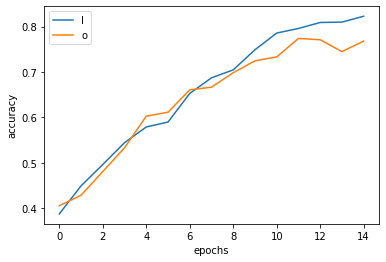

In [17]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend('lower right')

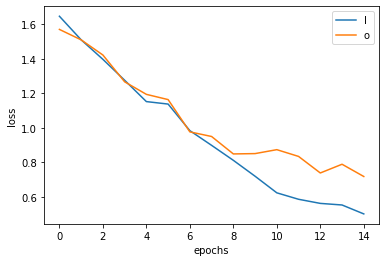

In [19]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('lower right')


In [20]:
model.save('indian_notes.h5')